In [ ]:
!git clone https://github.com/sumiya-kuroda/EMsegmentation-mito.git

Cloning into 'EMsegmentation-mito'...
remote: Enumerating objects: 305, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 305 (delta 30), reused 58 (delta 18), pack-reused 230
Receiving objects: 100% (305/305), 98.13 MiB | 30.27 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [ ]:
import os
import numpy as np
import cv2
import torchvision.models.segmentation
import torch
import torchvision.transforms as tf
Learning_Rate=1e-5
width=height=800 # image width and height
batchSize=3

In [ ]:
cv2.__version__

'4.6.0'

In [ ]:
TrainFolder="/content/EMsegmentation-mito/dataset/SNEMI3D_mito/train/"
ListImages=os.listdir(os.path.join(TrainFolder, "images")) 

In [ ]:
transformImg=tf.Compose([tf.ToPILImage(),tf.Resize((height,width)), tf.ToTensor(),tf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
transformAnn=tf.Compose([tf.ToPILImage(),tf.Resize((height,width)), tf.ToTensor()])

In [ ]:
idx = np.random.randint(0,len(ListImages)) # Pick random image
Img = cv2.imread(os.path.join(TrainFolder, "images",ListImages[idx]))

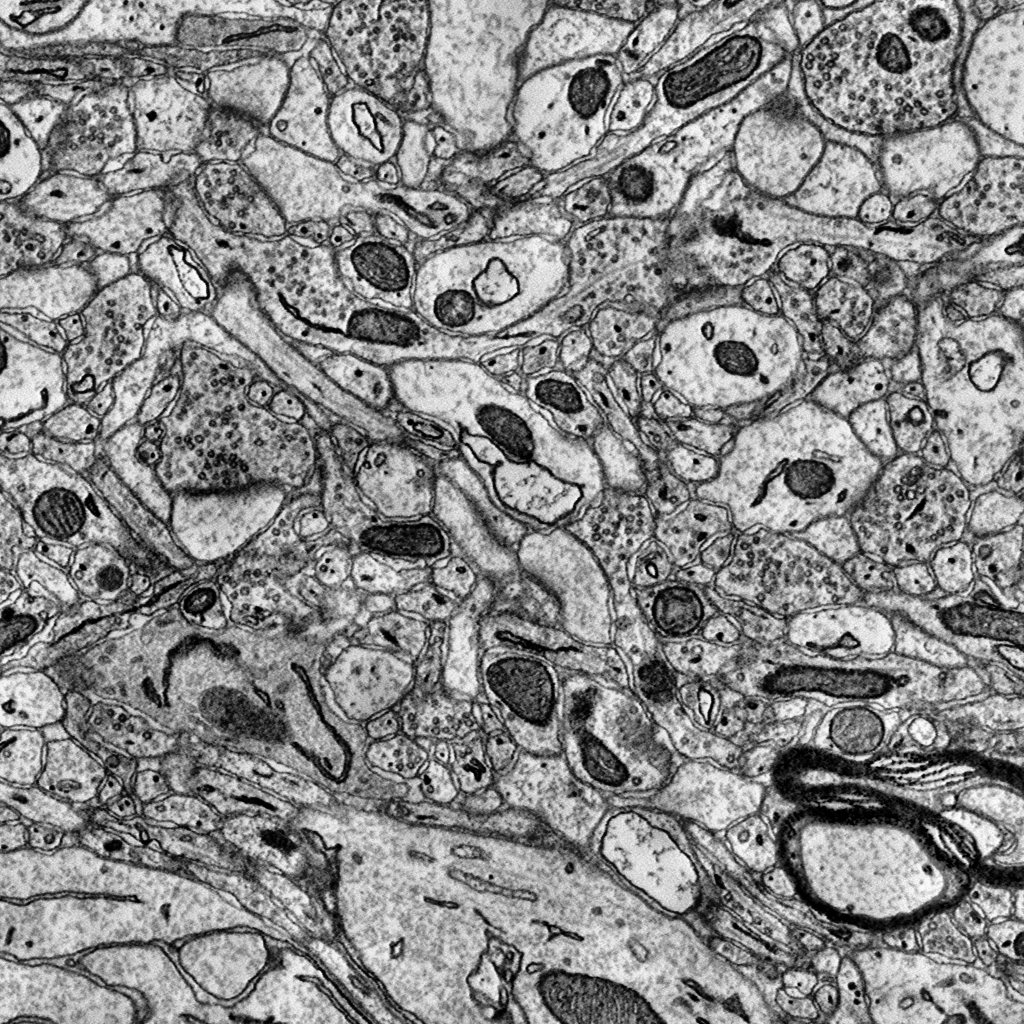

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(Img)

In [ ]:
Ann =  cv2.imread(os.path.join(TrainFolder,   "labels", ListImages[idx]),0)       

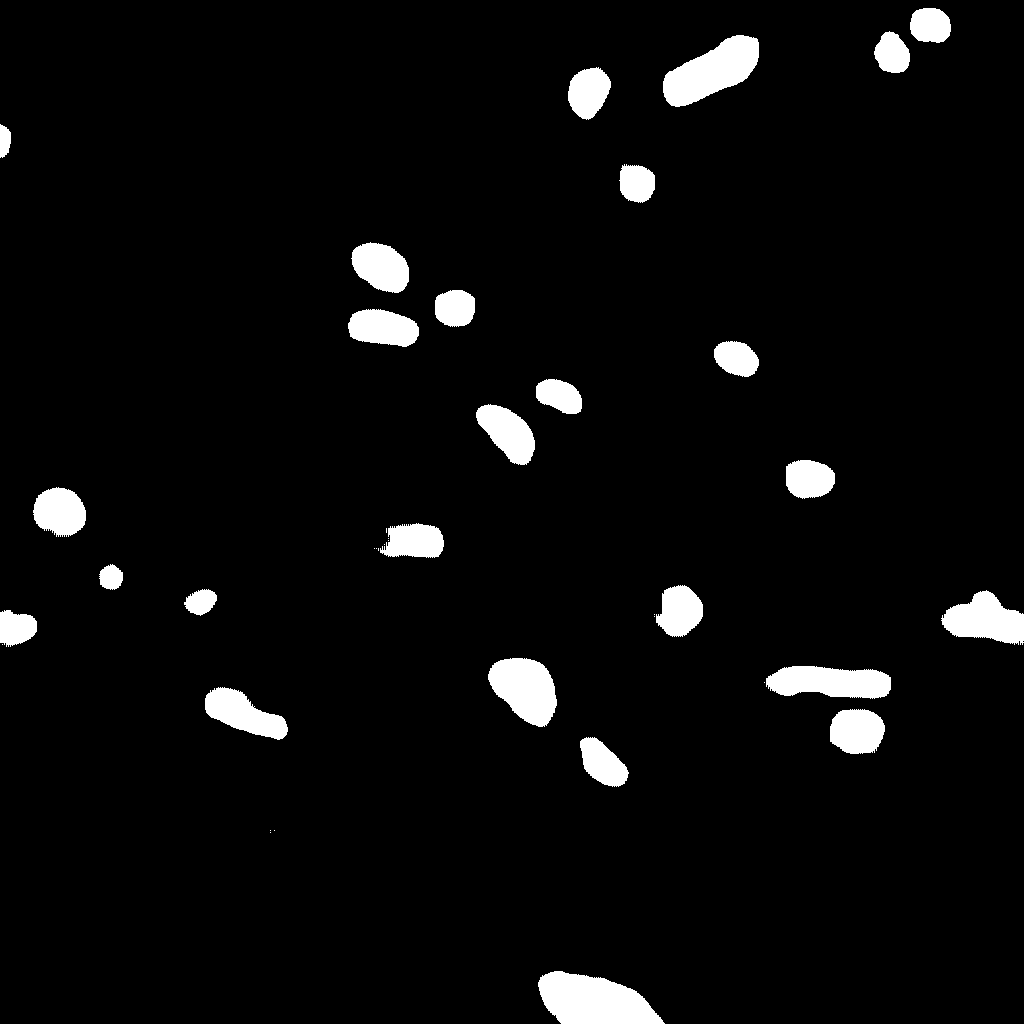

In [ ]:
cv2_imshow(Ann)

In [ ]:
Ann.shape

(1024, 1024)

In [ ]:
# threshold
thresh = cv2.threshold(Ann,128,255,cv2.THRESH_BINARY)[1]

In [ ]:
# get contours
result = Img.copy()
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
contours = contours[0] if len(contours) == 2 else contours[1]

In [ ]:
for cntr in contours:
  x,y,w,h = cv2.boundingRect(cntr)
  cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
  print("x,y,w,h:",x,y,w,h)

x,y,w,h: 538 971 127 53
x,y,w,h: 270 832 1 1
x,y,w,h: 274 830 1 1
x,y,w,h: 270 830 1 1
x,y,w,h: 580 737 49 50
x,y,w,h: 830 709 55 45
x,y,w,h: 205 687 83 53
x,y,w,h: 764 682 1 1
x,y,w,h: 766 666 125 33
x,y,w,h: 488 658 69 69
x,y,w,h: 2 644 1 1
x,y,w,h: 654 616 1 1
x,y,w,h: 654 614 1 1
x,y,w,h: 0 610 37 37
x,y,w,h: 941 590 83 55
x,y,w,h: 184 589 33 27
x,y,w,h: 656 585 47 52
x,y,w,h: 99 564 24 26
x,y,w,h: 378 548 1 3
x,y,w,h: 376 548 1 1
x,y,w,h: 374 548 1 1
x,y,w,h: 384 544 1 1
x,y,w,h: 388 540 1 1
x,y,w,h: 388 538 1 1
x,y,w,h: 386 528 1 5
x,y,w,h: 380 523 64 35
x,y,w,h: 33 487 53 50
x,y,w,h: 786 460 49 39
x,y,w,h: 476 404 59 61
x,y,w,h: 536 379 46 35
x,y,w,h: 714 341 45 36
x,y,w,h: 348 309 71 38
x,y,w,h: 435 290 40 37
x,y,w,h: 351 242 58 51
x,y,w,h: 619 164 36 39
x,y,w,h: 0 124 11 34
x,y,w,h: 568 67 43 53
x,y,w,h: 663 35 96 72
x,y,w,h: 874 31 36 42
x,y,w,h: 910 8 41 35


In [ ]:
# save resulting image
cv2.imwrite('two_blobs_result.jpg',result)      

True

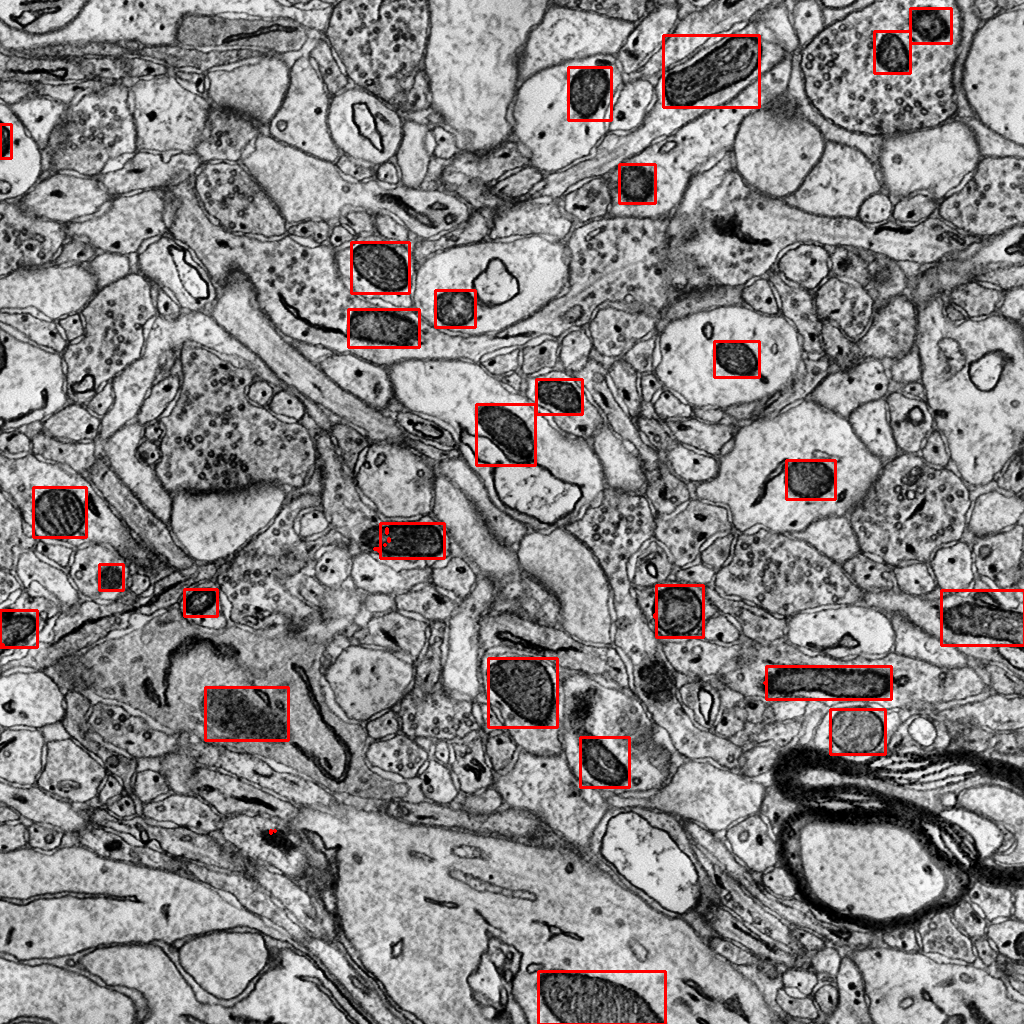

In [ ]:
# show thresh and result    
cv2_imshow(result)